### **Data Analysis**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/ModifiedCrabAgePrediction.csv")
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


The statistics of all the columns of data are as follows:

In [ ]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3456.000000,3468.000000,3413.000000,3462.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1.314131,1.022365,0.350509,23.786946,10.283194,5.168507,6.831221,9.977714
std,0.299806,0.248250,0.106293,13.920088,6.297363,3.116262,3.945384,3.216236
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.813974,5.372230,2.689659,3.752765,8.000000
50%,1.375000,1.062500,0.362500,23.119017,9.695529,4.890289,6.704657,10.000000
75%,1.537500,1.200000,0.412500,33.020080,14.330672,7.257472,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


The data types for all the columns are described as follows:

In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

### **Data Preprocessing**

In [ ]:
print("The number of missing values of the data is as follows:")
print(df.isna().sum())
#Remove missing datas
df_after=df.dropna()
print("The missing values after handling the missing values:")
print(df_after.isna().sum())

The number of missing values of the data is as follows:
Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64
The missing values after handling the missing values:
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


To remove the outliers of the data:

IQR: 3.00
Lower_Fence: 3.50
Upper_Fence: 15.50

Display Outliers
     Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
18     F  1.4875    1.1875  0.4250  35.351827       13.607760        6.378637   
37     I  1.3750    1.1000  0.4125  24.394745        8.845044        4.791066   
40     F  1.7750    1.4125  0.4875  48.945412       18.086981        9.539607   
64     M  1.9375    1.4250  0.5500  57.606184       20.836883       13.480187   
67     M  1.5750    1.2875  0.4000  28.803092       11.949314        6.917278   
...   ..     ...       ...     ...        ...             ...             ...   
3421   M  1.6250    1.3000  0.4750  38.115903       14.713390        8.674947   
3435   M  1.6375    1.3125  0.4625  35.692020       13.806207        6.279414   
3465   M  1.5125    1.1875  0.4000  45.812792       15.578050        9.412034   
3474   F  1.2375    1.0000  0.3875  18.271253        6.860579        3.756309   
3488   F  1.7125    1.3125  0.4375  48.47764

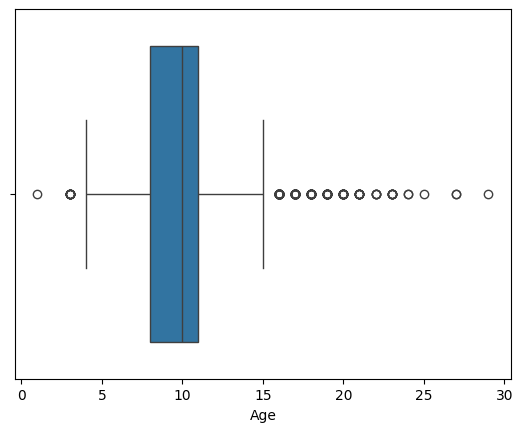

In [ ]:
import numpy as np
import matplotlib
import seaborn as sbn
sbn.boxplot(df_after['Age'],orient='h')

#Compute the Interquartile Raneg(IQR)
Q1 = df_after['Age'].quantile(0.25)
Q3 = df_after['Age'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (df_after[((df_after["Age"] < Lower_Fence) | (df_after["Age"] > Upper_Fence))])

# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (df_after[~((df_after["Age"] < Lower_Fence) | (df_after["Age"] > Upper_Fence))])

To categorise the datas with numbers:

In [ ]:
import numpy as np

# Separating Categorical Columns from Dataframe using select_dtypes()
df_categorical = df_after.select_dtypes(exclude=[np.number]) # exclude numerical using numpy
print(df_categorical,"\n")
print("Variables found in 'Sex' Category")
print(df_categorical['Sex'].unique())
print(df_categorical.Sex.value_counts())

     Sex
0      F
1      M
2      I
3      F
4      I
...   ..
3495   I
3496   F
3497   I
3498   I
3499   I

[3308 rows x 1 columns] 

Variables found in 'Sex' Category
['F' 'M' 'I']
Sex
M    1225
F    1052
I    1031
Name: count, dtype: int64


In [ ]:
#replace categorical data with number
df_categorical.Sex.replace({"M":1,"F":2 , "I":3}, inplace = True)
print(df_categorical)

      Sex
0       2
1       1
2       3
3       2
4       3
...   ...
3495    3
3496    2
3497    3
3498    3
3499    3

[3308 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select Non-Numerical Columns
data_column_category = df_after.select_dtypes (exclude=[np.number]).columns
print (data_column_category)
print (df_after[data_column_category].head())
# Iterate through column to convert to numeric data using LabelEncoder ()
label_encoder = LabelEncoder()
for i in data_column_category:
    df_after[i] = label_encoder.fit_transform (df_after[i])
print("Label Encoder Data:")
print(df_after.head())

Index(['Sex'], dtype='object')
  Sex
0   F
1   M
2   I
3   F
4   I
Label Encoder Data:
   Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0    0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1    2  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2    1  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3    0  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4    1  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  


<ipython-input-14-4f14ad24d265>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after[i] = label_encoder.fit_transform (df_after[i])


Transforming Data To a Different Scale:

In [ ]:
null_ = df_after.isna().any()
dtypes = df_after.dtypes
# Check for Missing Data
null_ = df_after.isna().any()
dtypes = df_after.dtypes
info = pd.concat ([null_,dtypes], axis = 1, keys = ['Null', 'type'])
print(info)

                 Null     type
Sex             False    int64
Length          False  float64
Diameter        False  float64
Height          False  float64
Weight          False  float64
Shucked Weight  False  float64
Viscera Weight  False  float64
Shell Weight    False  float64
Age             False    int64


In [ ]:
from sklearn import preprocessing

# Perform Standard Scaling and Implement fit_transform () method
std_scale = preprocessing.StandardScaler().fit_transform (df_after)
scaled_frame = pd.DataFrame (std_scale, columns = df_after.columns)
print (scaled_frame.head(10))

        Sex    Length  Diameter    Height    Weight  Shucked Weight  \
0 -1.270879  0.407858  0.608956  0.578881  0.061024        0.320576   
1  1.144558 -1.433933 -1.514099 -1.297936 -1.321466       -1.274128   
2 -0.063161 -0.931626 -1.008610 -0.946032 -1.138085       -1.125469   
3 -1.270879 -0.471178 -0.553670 -0.946032 -0.740759       -0.884461   
4 -0.063161 -1.433933 -1.463550 -1.297936 -1.213475       -1.089430   
5 -1.270879  0.784588  0.558407 -0.007624  0.350359        0.518788   
6 -1.270879 -0.052589 -0.098729 -0.242226 -0.437161       -0.670483   
7  1.144558  0.031128 -0.048180  0.226978 -0.015384       -0.053323   
8 -0.063161  0.910165  0.912249  0.578881  1.324317        1.581924   
9 -0.063161 -1.350215 -1.362453 -0.124925 -1.220606       -1.152498   

   Viscera Weight  Shell Weight       Age  
0        0.127475     -0.026047 -0.304899  
1       -1.222879     -1.339983 -1.244304  
2       -1.150133     -1.034834 -1.244304  
3       -0.931894     -0.406586  0.008235 

### **Regression Model Development**

**Linear Regression**

           Sex    Length  Diameter    Height    Weight  Shucked Weight  \
365   1.144558  0.198564  0.507858 -0.242226 -0.266005       -0.265049   
1148 -1.270879 -0.847908 -0.806414 -0.594129 -0.882370       -0.902481   
2795  1.144558 -1.978098 -1.867942 -1.415237 -1.445757       -1.398010   
2629  1.144558 -3.024570 -2.878921 -2.353645 -1.659702       -1.596222   
183  -0.063161 -0.973485 -1.059159 -1.063333 -1.174761       -1.188536   
1423 -1.270879 -1.308356 -1.210806 -0.594129 -1.200230       -1.138983   
3225 -1.270879  1.161318  0.962798  0.461580  0.921897        1.203520   
2014 -1.270879 -0.261884 -0.300925 -0.476828 -0.542096       -0.442989   
333   1.144558  1.370613  1.316641  1.048086  1.774620        1.840951   
2152  1.144558  0.868306  1.013347  1.165387  1.343674        0.219218   

      Viscera Weight  Shell Weight  
365        -0.340830     -0.262986  
1148       -0.927347     -0.761994  
2795       -1.427478     -1.411782  
2629       -1.622984     -1.677441  


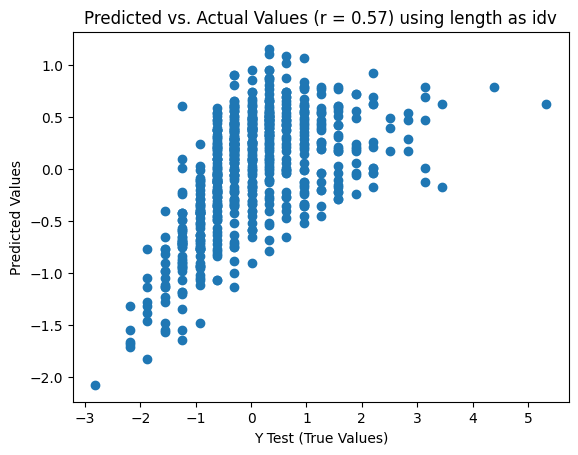

<ipython-input-17-b294041d3bdc>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


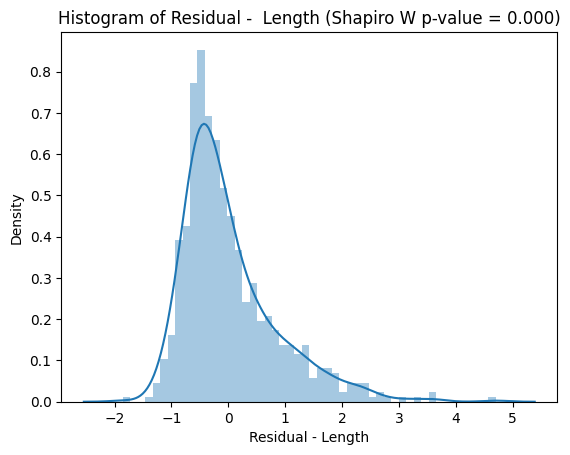

      Metric  Value
0        MAE  0.628
1        MSE  0.707
2       RMSE  0.841
3  R-Squared  0.320


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

data2 = shuffle(scaled_frame,random_state = 50)
DV = 'Age'
x = data2.drop(DV, axis=1)
y = data2[DV]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.head(10))

model = LinearRegression()
model.fit(X_train[['Length']], y_train)

prediction = model.predict(X_test[['Length']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Length)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using length as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Length')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Length (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.00+(0.57 x Diameter)


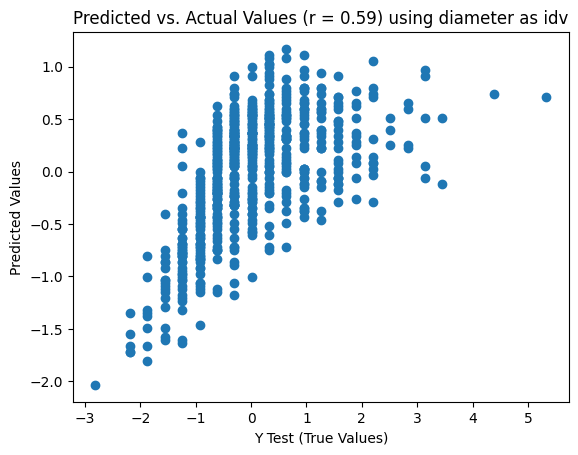

<ipython-input-19-d7c2ad8653f9>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


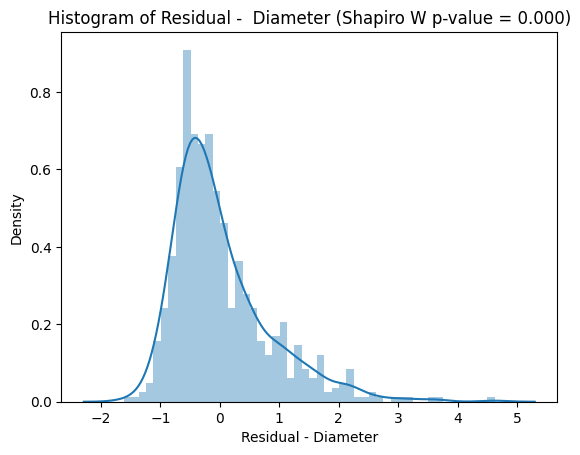

      Metric  Value
0        MAE  0.611
1        MSE  0.674
2       RMSE  0.821
3  R-Squared  0.352


In [ ]:
#Diameter as IDV
model.fit(X_train[['Diameter']], y_train)

prediction = model.predict(X_test[['Diameter']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Diameter)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using diameter as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Diameter')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Diameter (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.01+(0.51 x Height)


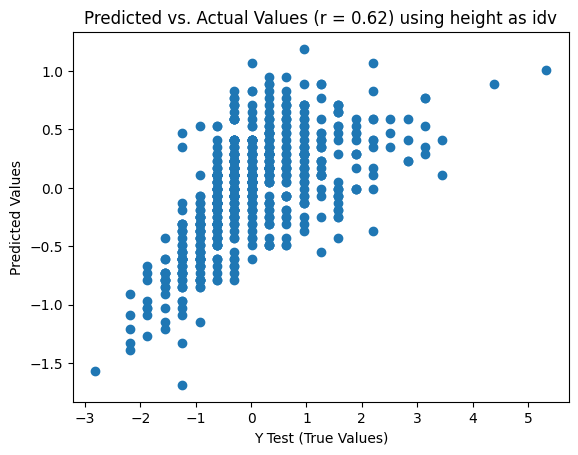

<ipython-input-20-dc5e44a8a37c>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


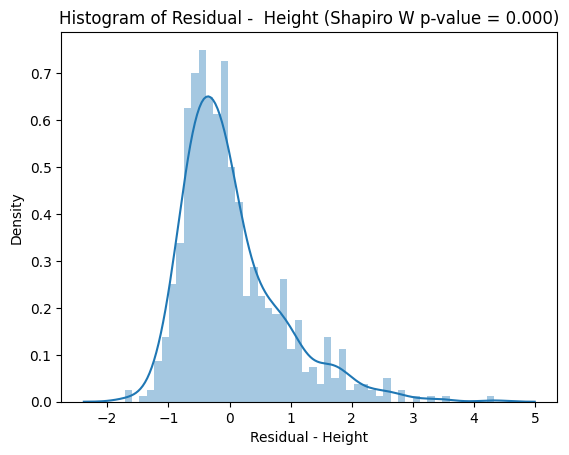

      Metric  Value
0        MAE  0.606
1        MSE  0.665
2       RMSE  0.816
3  R-Squared  0.361


In [ ]:
#Height as IDV
model.fit(X_train[['Height']], y_train)

prediction = model.predict(X_test[['Height']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Height)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using height as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Height')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Height (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.00+(0.53 x Weight)


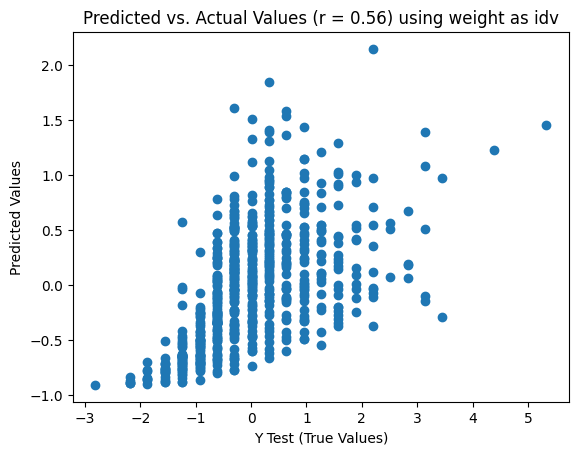

<ipython-input-21-75020f55df3c>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


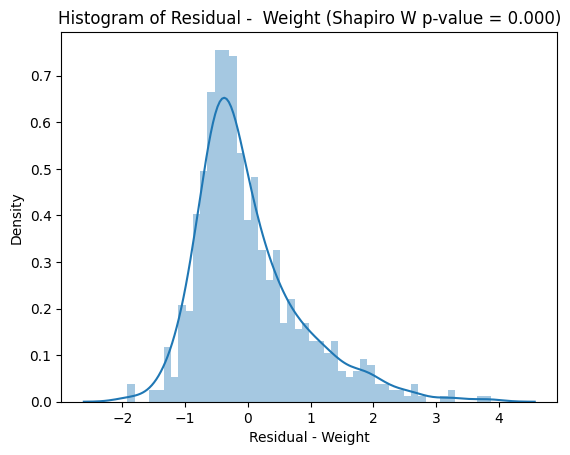

      Metric  Value
0        MAE  0.636
1        MSE  0.718
2       RMSE  0.847
3  R-Squared  0.309


In [ ]:
#Weight as IDV
model.fit(X_train[['Weight']], y_train)

prediction = model.predict(X_test[['Weight']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Weight)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using weight as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Weight')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Weight (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.00+(0.41 x Shucked Weight)


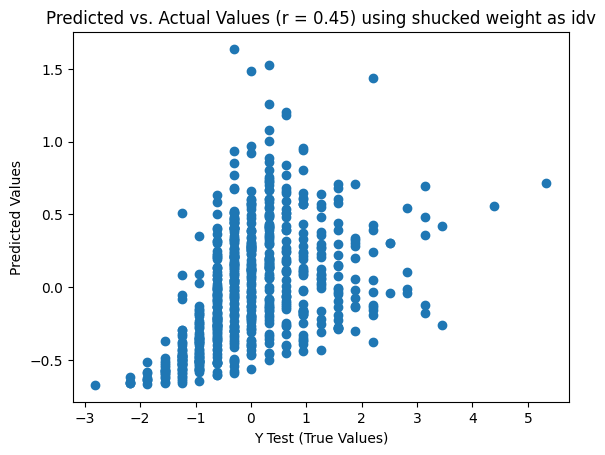

<ipython-input-22-5bf50006939f>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


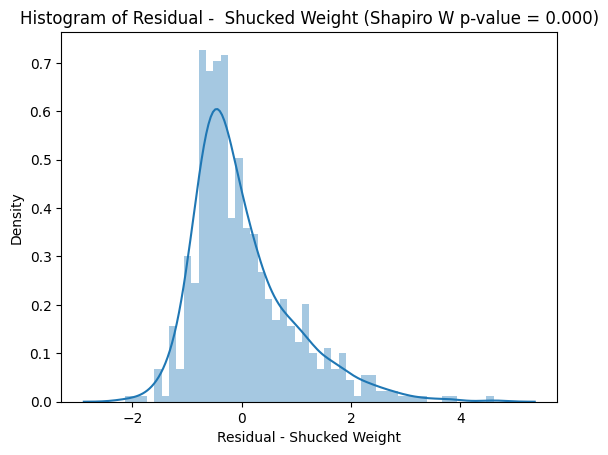

      Metric  Value
0        MAE  0.691
1        MSE  0.835
2       RMSE  0.914
3  R-Squared  0.196


In [ ]:
#Shucked Weight as IDV
model.fit(X_train[['Shucked Weight']], y_train)

prediction = model.predict(X_test[['Shucked Weight']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Shucked Weight)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using shucked weight as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Shucked Weight')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Shucked Weight (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.00+(0.49 x Viscera Weight)


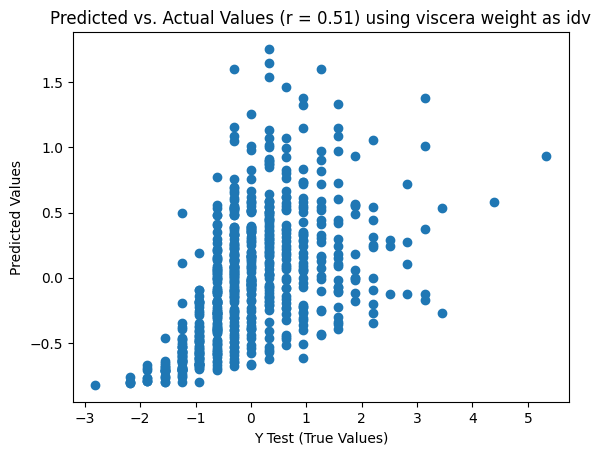

<ipython-input-23-b829ed871b91>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


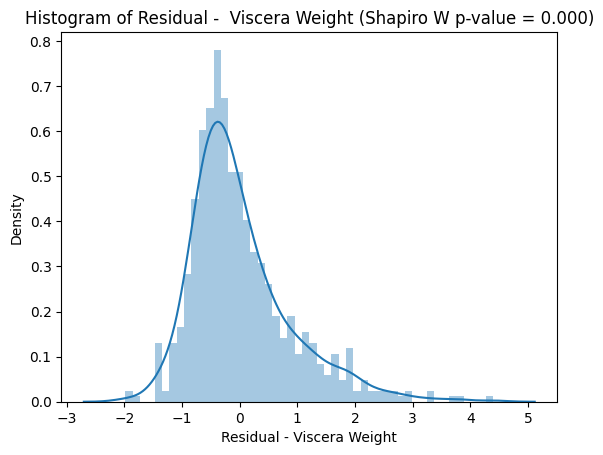

      Metric  Value
0        MAE  0.650
1        MSE  0.767
2       RMSE  0.876
3  R-Squared  0.262


In [ ]:
#Viscera Weight as IDV
model.fit(X_train[['Viscera Weight']], y_train)

prediction = model.predict(X_test[['Viscera Weight']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Viscera Weight)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using viscera weight as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Viscera Weight')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Viscera Weight (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.00+(0.62 x Shell Weight)


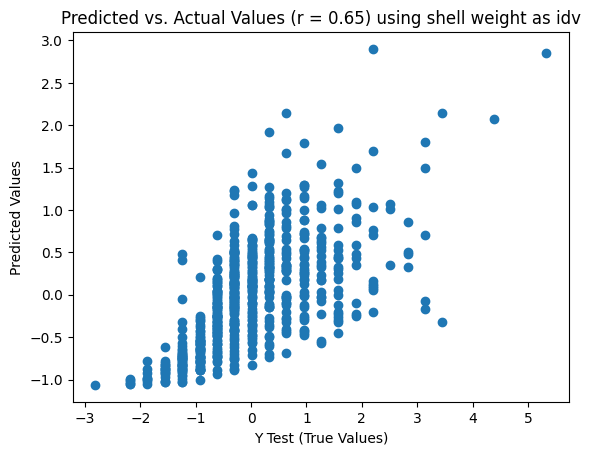

<ipython-input-24-a465eab30d0b>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


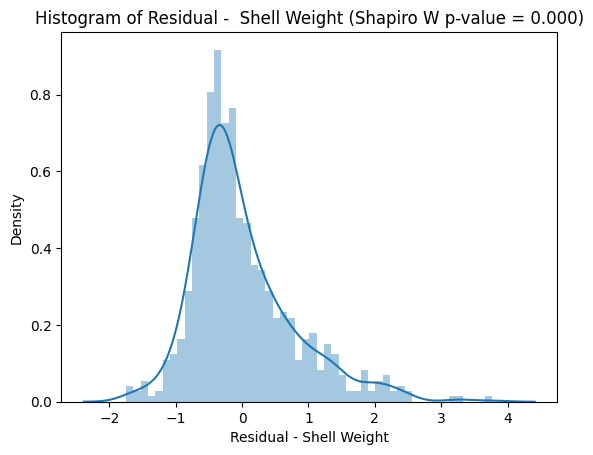

      Metric  Value
0        MAE  0.583
1        MSE  0.604
2       RMSE  0.777
3  R-Squared  0.419


In [ ]:
#Shell Weight as IDV
model.fit(X_train[['Shell Weight']], y_train)

prediction = model.predict(X_test[['Shell Weight']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Shell Weight)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using shell weight as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Shell Weight')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Shell Weight (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age =-0.00+(-0.05 x Sex)


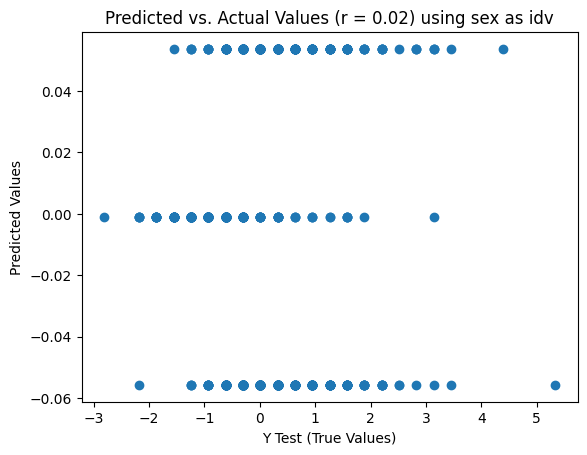

<ipython-input-25-73e48b2f20b1>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - prediction), bins = 50)


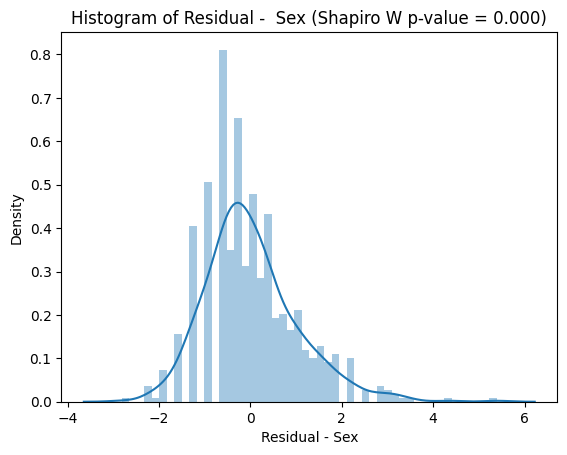

      Metric  Value
0        MAE   0.77
1        MSE   1.04
2       RMSE   1.02
3  R-Squared  -0.00


In [ ]:
#Sex as IDV
model.fit(X_train[['Sex']], y_train)

prediction = model.predict(X_test[['Sex']])
intercept = model.intercept_
coefficient = model.coef_
print('Age ={0:0.2f}+({1:0.2f} x Sex)'.format(intercept,coefficient[0]))

%matplotlib inline
plt.scatter (y_test, prediction)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using sex as idv'.format(pearsonr(y_test, prediction)[0], 2))
plt.show()

sns.distplot ((y_test - prediction), bins = 50)
plt.xlabel ('Residual - Sex')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  Sex (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - prediction)[1]))
plt.show()

# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, prediction),
metrics.mean_squared_error (y_test, prediction),
np.sqrt (metrics.mean_squared_error (y_test, prediction)),
metrics.explained_variance_score (y_test, prediction)]}).round(3)
print(metrics_df)

Age = -0.00 + (0.01 x Sex) + (-0.05 x Length) + (0.42 x Diameter) +(0.12 x Height) + (1.72 x Weight) + (-1.51 x Shucked Weight) + (-0.38 x Viscera Weight) + (0.22 x Shell Weight)


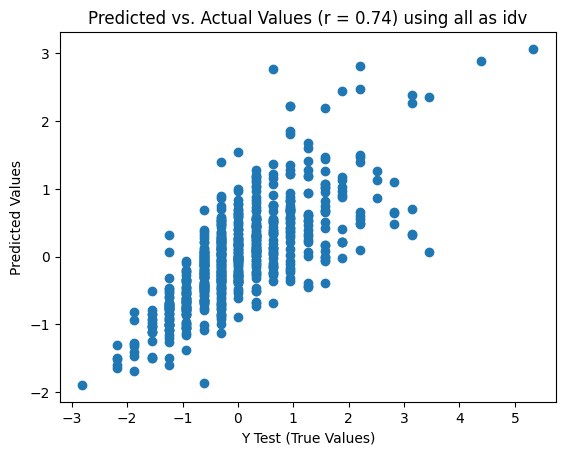

<ipython-input-26-6916a5d2b116>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - predictions), bins = 50)


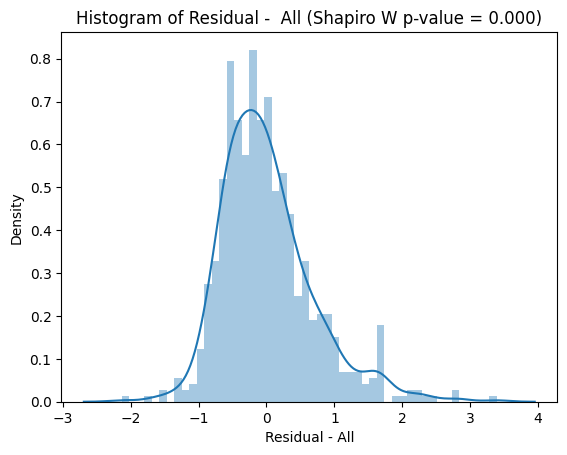

      Metric  Value
0        MAE  0.511
1        MSE  0.466
2       RMSE  0.683
3  R-Squared  0.552


In [ ]:
#All IDV
model.fit (X_train , y_train)
predictions = model.predict(X_test)
intercept = model.intercept_
coefficient = model.coef_
print('Age = {0:0.2f} + ({1:0.2f} x Sex) + ({2:0.2f} x Length) + ({3:0.2f} x Diameter) +({4:0.2f} x Height) + ({5:0.2f} x Weight) + ({6:0.2f} x Shucked Weight) + ({7:0.2f} x Viscera Weight) + ({8:0.2f} x Shell Weight)'.format(intercept,
coefficient[0],
coefficient[1],
coefficient[2],
coefficient[3],
coefficient[4],
coefficient[5],
coefficient[6],
coefficient[7]))
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f}) using all as idv'.format(pearsonr(y_test, predictions)[0]))
plt.show()
sns.distplot ((y_test - predictions), bins = 50)
plt.xlabel ('Residual - All')
plt.ylabel('Density')
plt.title ('Histogram of Residual -  All (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

### **Conclusion**

Linear regression is the best model on the training set to predict crab ages.